In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 7.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [4]:
#name = 'chess.dat'
name = 'mushroom.dat'

dataset = '/content/drive/My Drive/Colab Notebooks/Apriori/' + name

data = pd.read_csv(dataset, sep=' ', header=None)
data.fillna(0,inplace=True)
data=data.astype(int)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,3,9,13,23,25,34,36,38,40,52,54,59,63,67,76,85,86,90,93,98,107,113,0
1,2,3,9,14,23,26,34,36,39,40,52,55,59,63,67,76,85,86,90,93,99,108,114,0
2,2,4,9,15,23,27,34,36,39,41,52,55,59,63,67,76,85,86,90,93,99,108,115,0
3,1,3,10,15,23,25,34,36,38,41,52,54,59,63,67,76,85,86,90,93,98,107,113,0
4,2,3,9,16,24,28,34,37,39,40,53,54,59,63,67,76,85,86,90,94,99,109,114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,88,90,93,106,112,119,0
8120,2,3,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,87,90,93,106,110,119,0
8121,2,6,9,13,24,28,35,36,39,41,52,58,59,63,73,83,85,88,90,93,106,112,119,0
8122,1,7,10,13,24,31,34,36,38,48,53,58,59,66,67,76,85,86,90,94,102,110,119,0


In [5]:
row = len(data)
col = len(data.values[0])
#print(row, col)

In [6]:
records_List = []
for i in range(0, row):
    records_List.append([
                        int(data.values[i,j])
                        for j in range(0, col)
                            if (int(data.values[i,j]) != 0)
                       ])
records_List

[[1,
  3,
  9,
  13,
  23,
  25,
  34,
  36,
  38,
  40,
  52,
  54,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  107,
  113],
 [2,
  3,
  9,
  14,
  23,
  26,
  34,
  36,
  39,
  40,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  99,
  108,
  114],
 [2,
  4,
  9,
  15,
  23,
  27,
  34,
  36,
  39,
  41,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  99,
  108,
  115],
 [1,
  3,
  10,
  15,
  23,
  25,
  34,
  36,
  38,
  41,
  52,
  54,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  107,
  113],
 [2,
  3,
  9,
  16,
  24,
  28,
  34,
  37,
  39,
  40,
  53,
  54,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  94,
  99,
  109,
  114],
 [2,
  3,
  10,
  14,
  23,
  26,
  34,
  36,
  39,
  41,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  108,
  114],
 [2,
  4,
  9,
  15,
  23,
  26,
  34,
  36,
  39,
  42,
  52,
  55,
  59,
  63,
  67,
  76,
  85,
  86,
  90,
  93,
  98,
  108,
  115],
 [2,
  4,
  10,
  15,
  23,
  27

In [7]:
te = TransactionEncoder()
te_ary = te.fit(records_List).transform(records_List)
dataX = pd.DataFrame(te_ary, columns=te.columns_)
dataX = dataX.astype(int)
#dataX

In [8]:
fpgrowth(dataX, min_support=.8)

,support,itemsets
0,1.000000,(84)
1,0.975382,(85)
2,0.974151,(33)
3,0.921713,(89)
4,0.838503,(35)
5,0.975382,"(84, 85)"
6,0.974151,"(33, 84)"
7,0.973166,"(33, 85)"
8,0.973166,"(33, 84, 85)"
9,0.921713,"(89, 84)"


In [9]:
threshold = 1
total_Time = []
threshold_value = []

for i in range(0,10):
  begin = time.time()
  result = fpgrowth(dataX, min_support=threshold)
  end = time.time()
  total_Time.append(end-begin)
  threshold_value.append(threshold)
  threshold -= 0.1
  print(begin,end)
total_Time
#threshold_value

1632120077.2974389 1632120077.3828893
1632120077.3837895 1632120077.4825928
1632120077.4833453 1632120077.5888336
1632120077.5911555 1632120077.7038887
1632120077.7040648 1632120077.8206127
1632120077.8214285 1632120077.9449492
1632120077.9453118 1632120078.110699
1632120078.1115515 1632120078.3051338
1632120078.305828 1632120078.9176085
1632120078.9181392 1632120083.1669207


[0.08545041084289551,
 0.09880328178405762,
 0.10548830032348633,
 0.11273312568664551,
 0.11654782295227051,
 0.1235206127166748,
 0.16538715362548828,
 0.19358229637145996,
 0.6117804050445557,
 4.248781442642212]

In [10]:
print(total_Time)
print(threshold_value)

[0.08545041084289551, 0.09880328178405762, 0.10548830032348633, 0.11273312568664551, 0.11654782295227051, 0.1235206127166748, 0.16538715362548828, 0.19358229637145996, 0.6117804050445557, 4.248781442642212]
[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]


-->**Mushroom**

[0.25842881202697754, 0.10440802574157715, 0.1211397647857666, 0.10687017440795898, 0.12969374656677246, 0.1438894271850586, 0.1778252124786377, 0.23185992240905762, 0.5937631130218506, 4.875962972640991]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

-->**Chess**

[0.03931140899658203, 0.07153558731079102, 0.2961697578430176, 1.0832898616790771, 4.8713319301605225, 20.427759408950806, 96.04614901542664]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show>

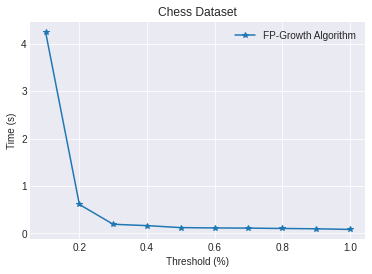

In [11]:
plt.style.use('seaborn-darkgrid')

plt.plot(threshold_value, total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['FP-Growth Algorithm'], loc='upper right')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_apriori.pdf', dpi=300, bbox_inches='tight')
plt.show